<a href="https://colab.research.google.com/github/Omerliler/CNN-Image-Classification/blob/main/CNN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install required libraries


In [ ]:
pip install -q tensorflow tensorflow-datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


from tensorflow import keras
tfds.disable_progress_bar()

## Tensorflow Dataset library 

In [ ]:
tfds.list_builders()

In [ ]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info
print(info)

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)



## Load Data

In [ ]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

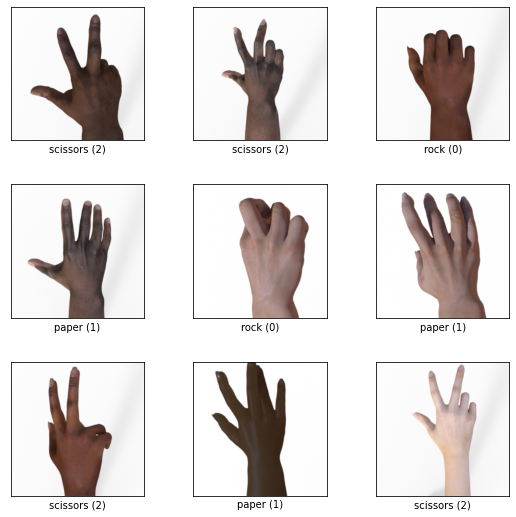

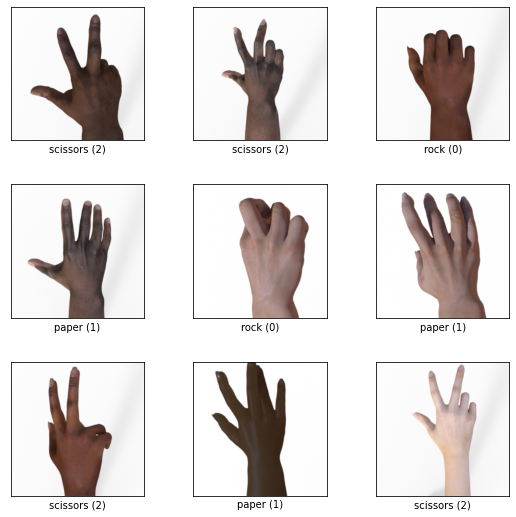

In [ ]:
tfds.show_examples(ds_train, info)

## Preparation of Data

In [ ]:
train_images = np.array([example["image"].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example["label"].numpy()for example in ds_train])

test_images = np.array([example["image"].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example["label"].numpy()for example in ds_test])

In [ ]:
test_images.shape

(372, 300, 300)

In [ ]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

## Building up the basic model

1.   Flatten: Eliminate the dimension of input array and make it 1 dimension array.
2.   Dense: Dense layer is a connection layer between input and output. It takes info from previous layer and send it to next layer.





In [ ]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 5, batch_size = 32)

Epoch 1/5
79/79 [==============================] - 3s 28ms/step - loss: 21.2684 - accuracy: 0.4492
Epoch 2/5
79/79 [==============================] - 2s 26ms/step - loss: 2.0710 - accuracy: 0.6393
Epoch 3/5
79/79 [==============================] - 2s 27ms/step - loss: 2.2466 - accuracy: 0.6909
Epoch 4/5
79/79 [==============================] - 2s 27ms/step - loss: 0.9275 - accuracy: 0.7746
Epoch 5/5
79/79 [==============================] - 2s 27ms/step - loss: 0.3984 - accuracy: 0.8794


In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 13ms/step - loss: 2.5564 - accuracy: 0.4839


[2.556387424468994, 0.4838709533214569]

## Adding Convolutional Layers

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs



```
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding="valid",
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

```




In [ ]:
model = keras.Sequential([
  keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation='softmax')

])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 5, batch_size = 32)

Epoch 1/5
79/79 [==============================] - 57s 352ms/step - loss: 6.2459 - accuracy: 0.6663
Epoch 2/5
79/79 [==============================] - 26s 324ms/step - loss: 0.2764 - accuracy: 0.9437
Epoch 3/5
79/79 [==============================] - 26s 324ms/step - loss: 0.0911 - accuracy: 0.9881
Epoch 4/5
79/79 [==============================] - 26s 324ms/step - loss: 0.0094 - accuracy: 0.9980
Epoch 5/5
79/79 [==============================] - 26s 324ms/step - loss: 0.0072 - accuracy: 0.9996


In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 3s 240ms/step - loss: 1.8753 - accuracy: 0.4812


[1.87532377243042, 0.4811827838420868]

## Adding Average Pooling for extract features more smoothly

In [ ]:
model = keras.Sequential([
  keras.layers.AveragePooling2D(6, 3, input_shape=(300,300,1)),
  keras.layers.Conv2D(64, 3, activation='relu'),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation='softmax')

])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 5, batch_size = 32)

Epoch 1/5
79/79 [==============================] - 5s 47ms/step - loss: 0.7963 - accuracy: 0.6810
Epoch 2/5
79/79 [==============================] - 3s 43ms/step - loss: 0.2272 - accuracy: 0.9409
Epoch 3/5
79/79 [==============================] - 3s 44ms/step - loss: 0.0705 - accuracy: 0.9849
Epoch 4/5
79/79 [==============================] - 3s 44ms/step - loss: 0.0335 - accuracy: 0.9944
Epoch 5/5
79/79 [==============================] - 3s 44ms/step - loss: 0.0185 - accuracy: 0.9976


In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 24ms/step - loss: 0.7930 - accuracy: 0.7124


[0.7930178642272949, 0.7123655676841736]

## Keras Tuner for Hyperparamater Optimization

In [ ]:
pip install keras-tuner 

In [ ]:
import keras_tuner as kt
from keras_tuner import RandomSearch


def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
  
  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  
  return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Trial 32 Complete [00h 01m 23s]
val_accuracy: 0.7365591526031494

Best val_accuracy So Far: 0.8118279576301575
Total elapsed time: 00h 34m 54s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models()[0]

best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 31ms/step - loss: 0.5807 - accuracy: 0.8118


[0.580704391002655, 0.8118279576301575]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 99, 99, 1)        0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 97, 97, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 16)        9232      
                                                                 
 conv2d_2 (Conv2D)           (None, 93, 93, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 32)        0

In [ ]:
tuner.results_summary()

In [ ]:
pred_images = np.array([example["image"].numpy() for example in ds_test])
pred_labels = np.array([example["label"].numpy()for example in ds_test])

import pandas as pd
data = pd.DataFrame(columns=['image','label','prediction'])

for i in range(1,len(pred_images)):
  data.loc[i-1,'image'] = pred_images[i-1]
  data.loc[i-1,'label'] = pred_labels[i-1]
  result = best_model.predict(test_images[i-1:i])
  prediction = list(result[0]).index(result[0].max())
  data.loc[i-1,'prediction'] = prediction


FailCount: 69/371


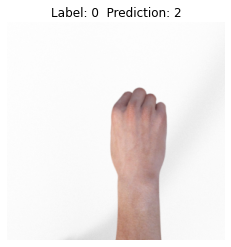

In [ ]:
import matplotlib.pyplot as plt

imNo = 29

imgCount = 371
data = data[data['label'] != data['prediction']]  
print('FailCount: ' + str(len(data)) + '/{}'.format(imgCount))
plt.axis('off')
plt.title('Label: ' + str(data['label'].iloc[int(imNo)]) + '  Prediction: ' + str(data['prediction'].iloc[int(imNo)]))
imgPlot = plt.imshow(data['image'].iloc[int(imNo)])

## Rock:0 Paper:1 Scissor:2

## Videos For CNN Visualizing
https://www.youtube.com/watch?v=pj9-rr1wDhM

